In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random
import seaborn as sns 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation, Dropout
import tensorflow as tf
from tensorflow.keras.models import load_model
from keras.applications import vgg16
from keras.callbacks import ModelCheckpoint
from tqdm import tqdm
from random import shuffle
import keras 
from keras.layers import Dense,Dropout, Conv2D,MaxPooling2D , Activation, Flatten, BatchNormalization, SeparableConv2D
from keras.models import Sequential
from keras.utils  import to_categorical

In [2]:
def load_fruits_data():
    quality=['apples', 'banana','oranges']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir(r'C:\Users\fadel\Documents\data rpl\test')):
        if quality[0] in cata:
            path_main=os.path.join(r'C:\Users\fadel\Documents\data rpl\test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        elif quality[1] in cata:
            path_main=os.path.join(r'C:\Users\fadel\Documents\data rpl\test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
        elif quality[2] in cata:
            path_main=os.path.join(r'C:\Users\fadel\Documents\data rpl\test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,2])
        
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y 
    

In [3]:
X_val,Y_val=load_fruits_data()

100%|██████████| 6/6 [00:09<00:00,  1.59s/it]


Shuffling your data.....


100%|██████████| 2698/2698 [00:00<00:00, 1349419.53it/s]


In [4]:
X_val=np.array(X_val)

In [5]:
X_val=X_val/255.0

In [6]:
Y_val=np.array(Y_val)

In [7]:
from keras.models import Model, load_model

In [8]:
fruit_cat = load_model(r'C:\Users\fadel\Documents\data rpl\model\fruitcategory.h5')
rotten_fresh = load_model(r'C:\Users\fadel\Documents\data rpl\model\rottenvsfresh.h5')

In [9]:
def upload_check(img,model_1=None, model_2=None):
    # img=cv2.resize(img,(100,100))
    # img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    predict = model_1.predict(img.reshape(1,100,100,3))
    classes=np.argmax(predict,axis=1)

    predict_quality = model_2.predict(img.reshape(1,100,100,3))

    plt.imshow(img)
  
    plt.title('Fruit:{}, quality:{}'.format(classes, predict_quality))
    plt.imshow(img)

In [ ]:
#quality=['apples', 'banana','oranges']

1/1 [==============================] - 0s 24ms/step


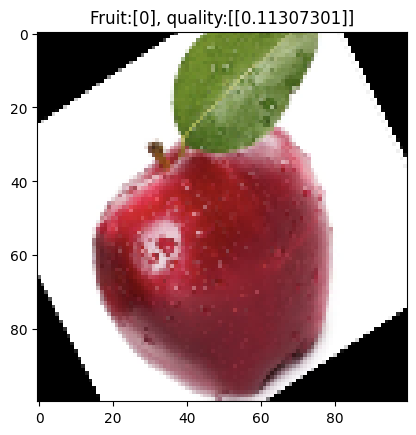

In [18]:
upload_check(X_val[89], fruit_cat, rotten_fresh)